### Implementation in Python



In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
#Let's start with importing necessary libraries
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv("winequality_red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


The data set consists following Input variables :
1 - fixed acidity  2 - volatile acidity  3 - citric acid  4 - residual sugar  5 - chlorides  6 - free sulfur dioxide

7 - total sulfur dioxide  8 - density  9 - pH   10 - sulphates   11 - alcohol

and the Output variable gives the quality of th wine based on the input variables: 

12 - quality (score between 0 and 10)

In [3]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Exploratory Data Analysis

In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


We can see there is no missing data in the columns. Great!!

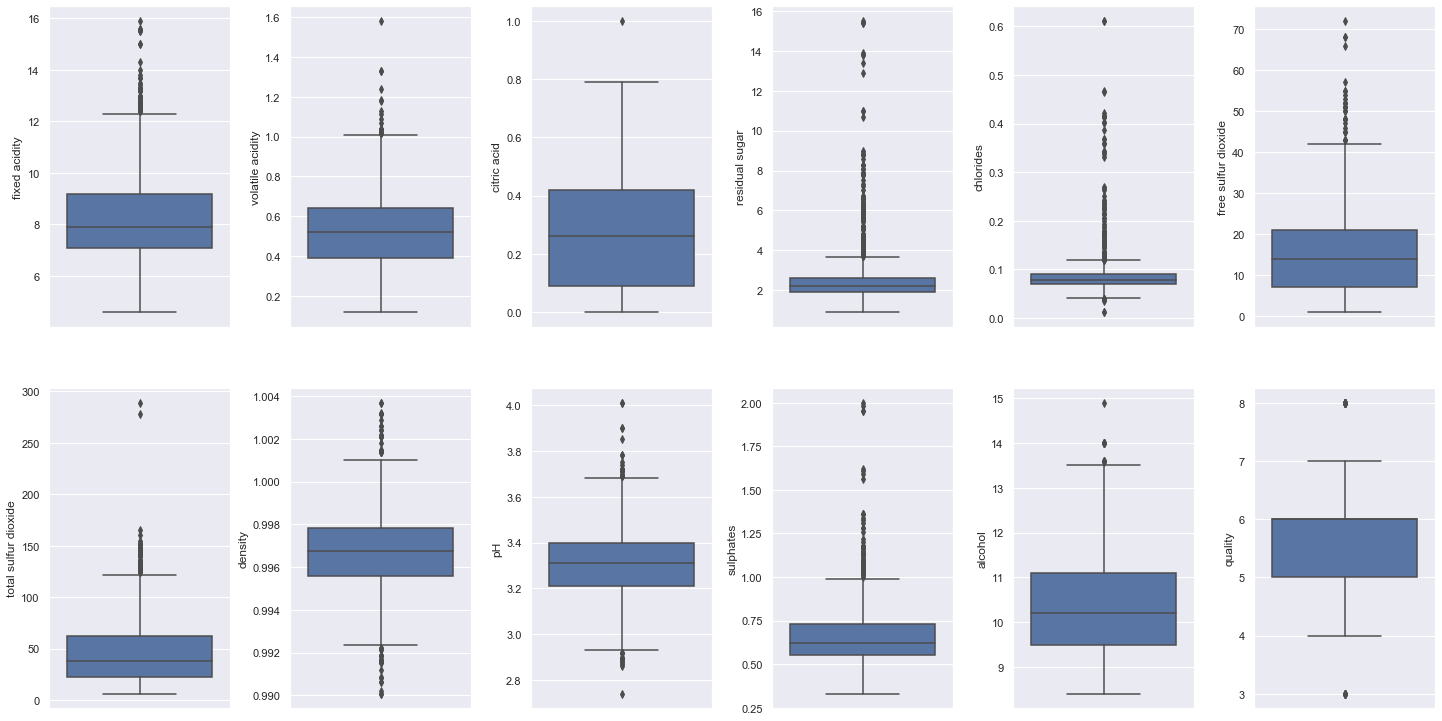

In [5]:
# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.boxplot(y=col, data=data, ax=ax[index])
        index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

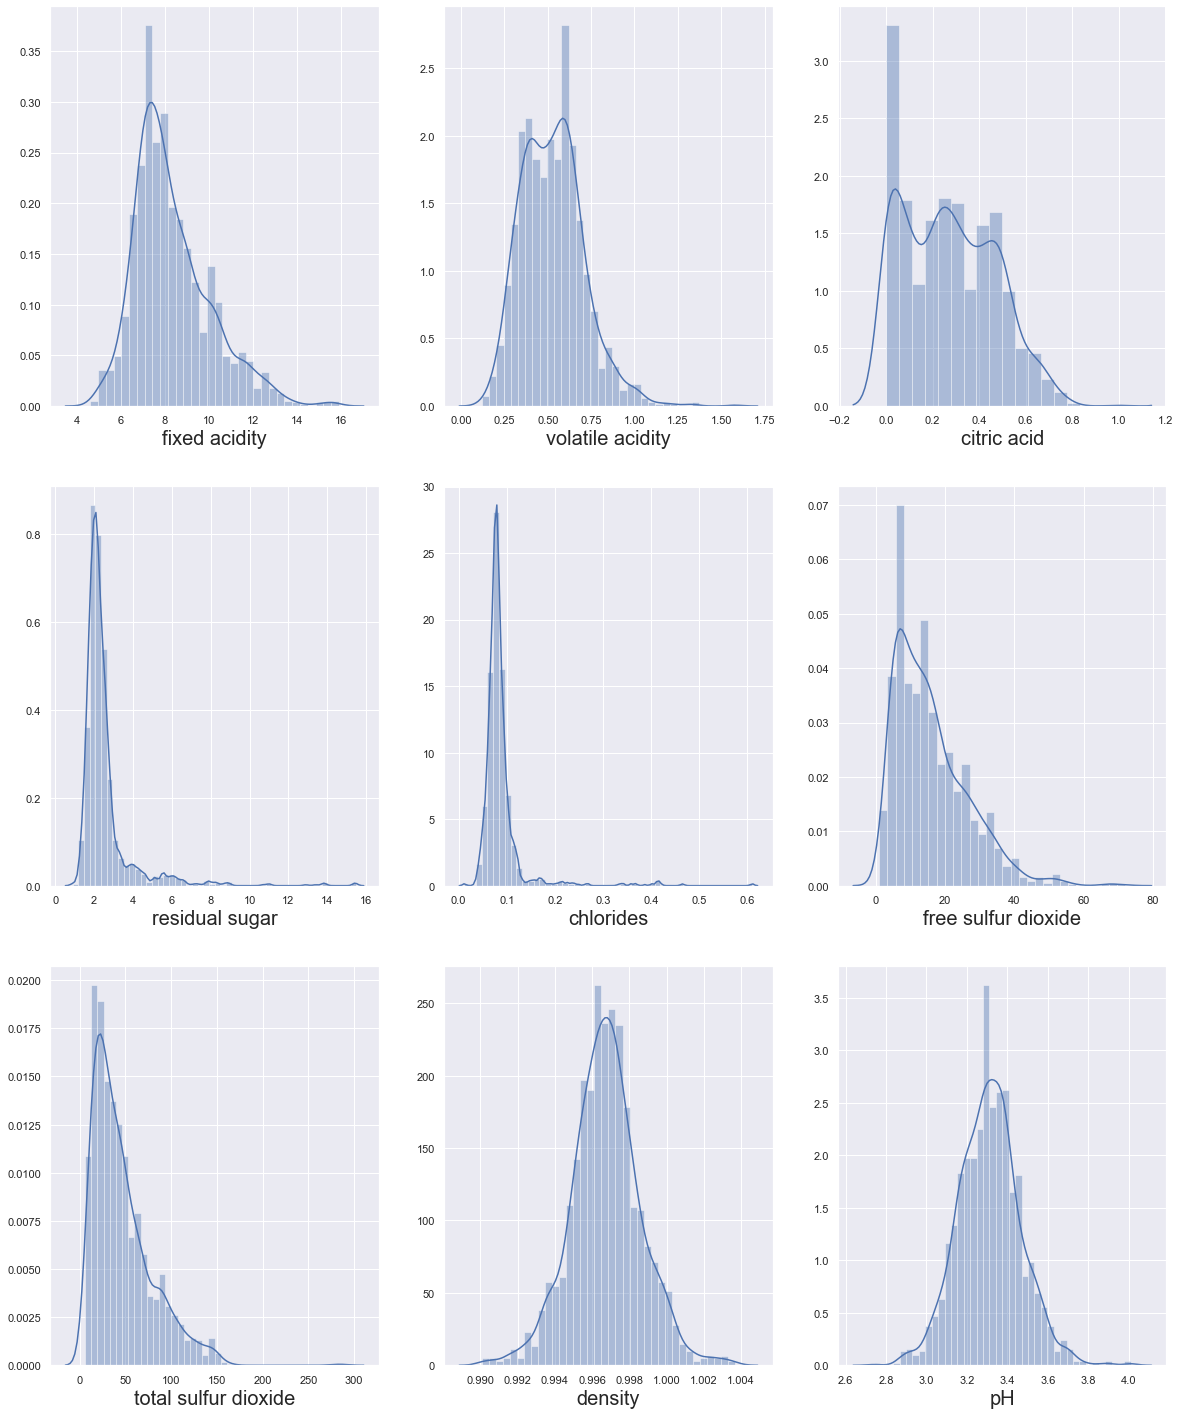

In [6]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in data:
    if plotnumber<=9 :     # as there are 9 columns in the data
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel('Salary',fontsize=20)
    plotnumber+=1
plt.show()

In [7]:
x = data.drop(columns = 'quality')
y = data['quality']

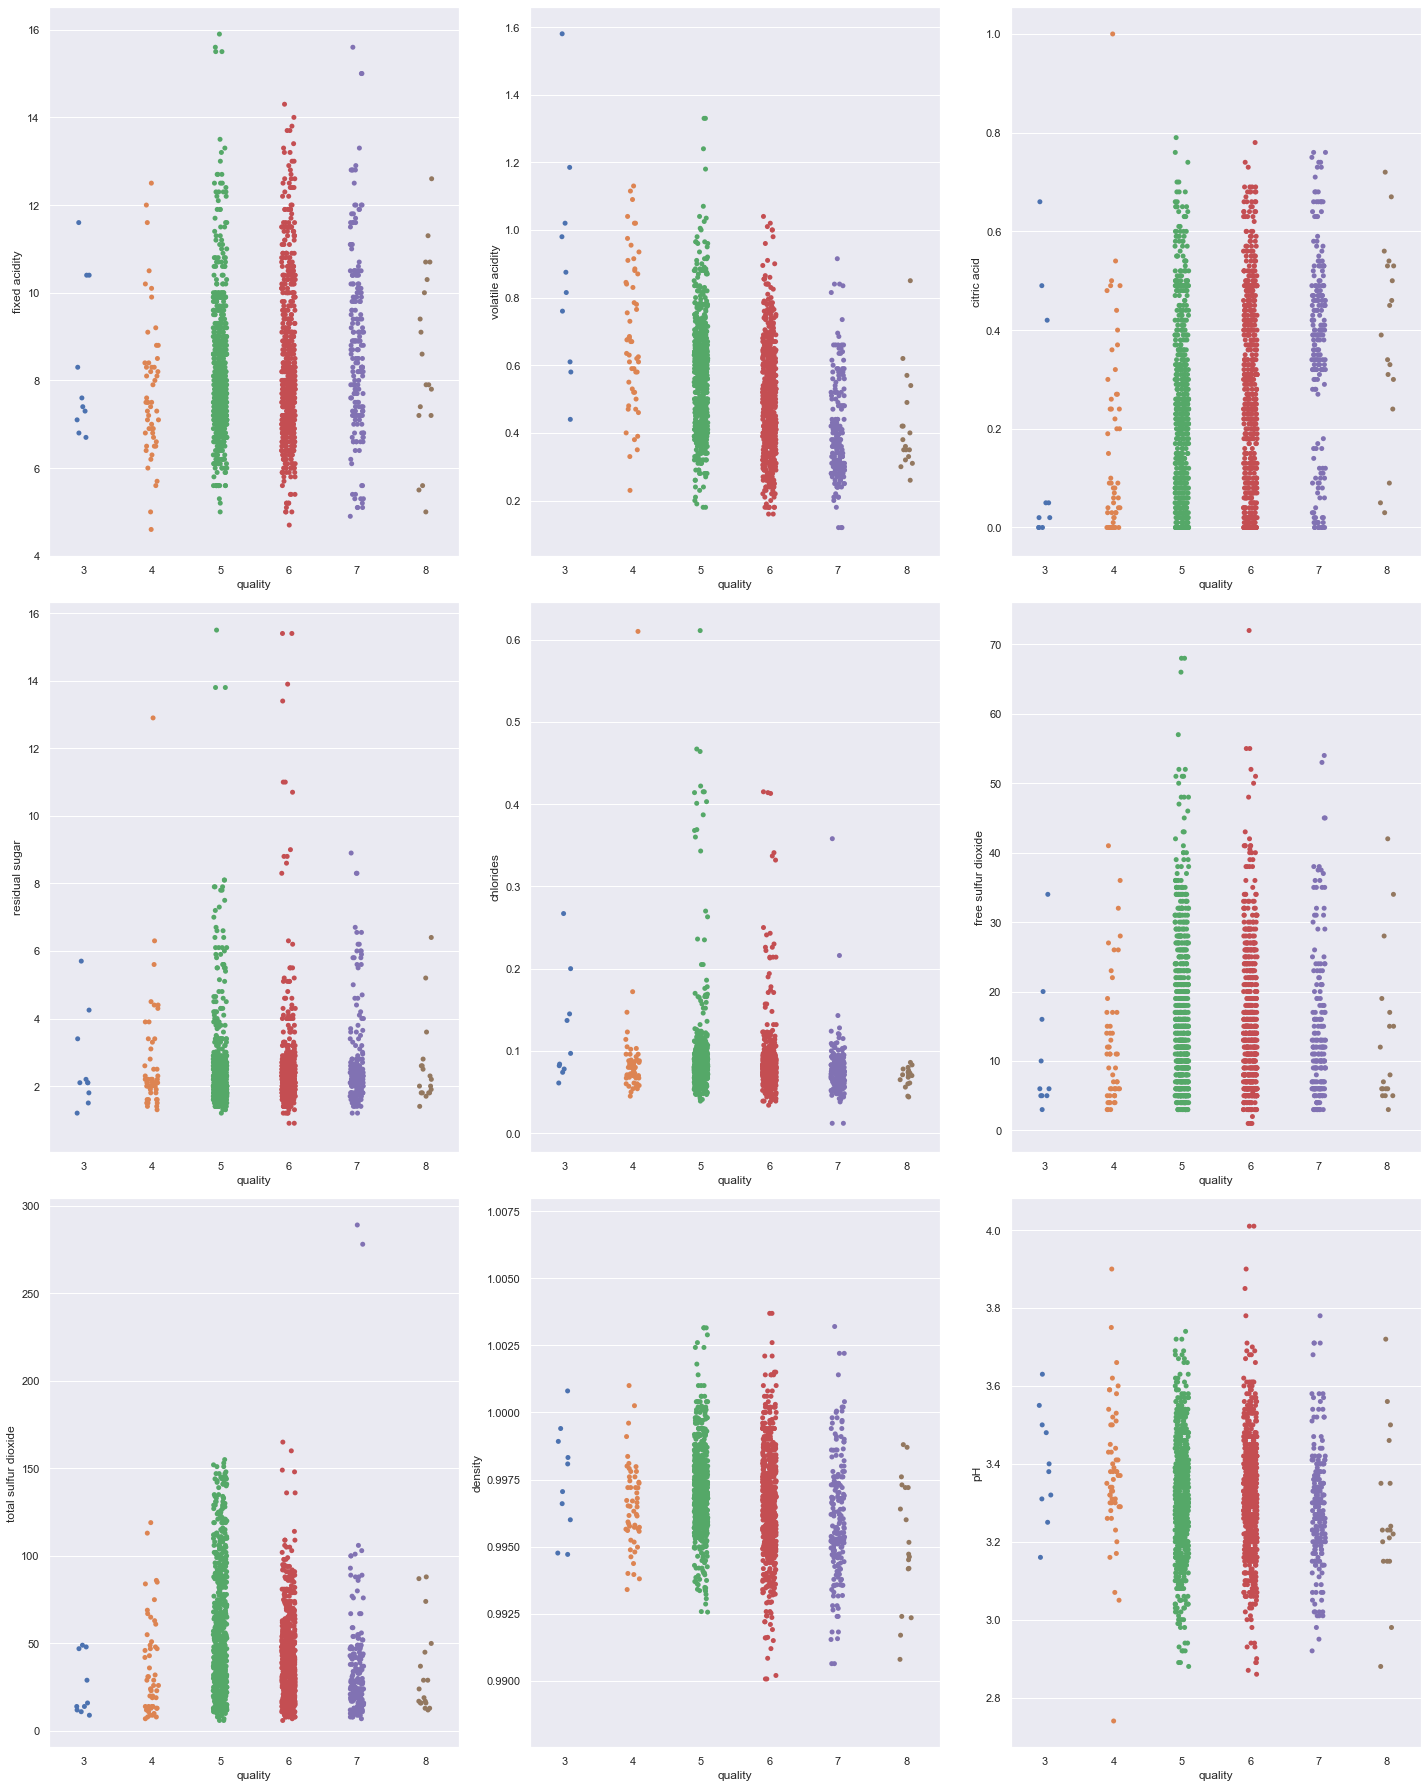

In [8]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.tight_layout()

### Coorelation Matrix

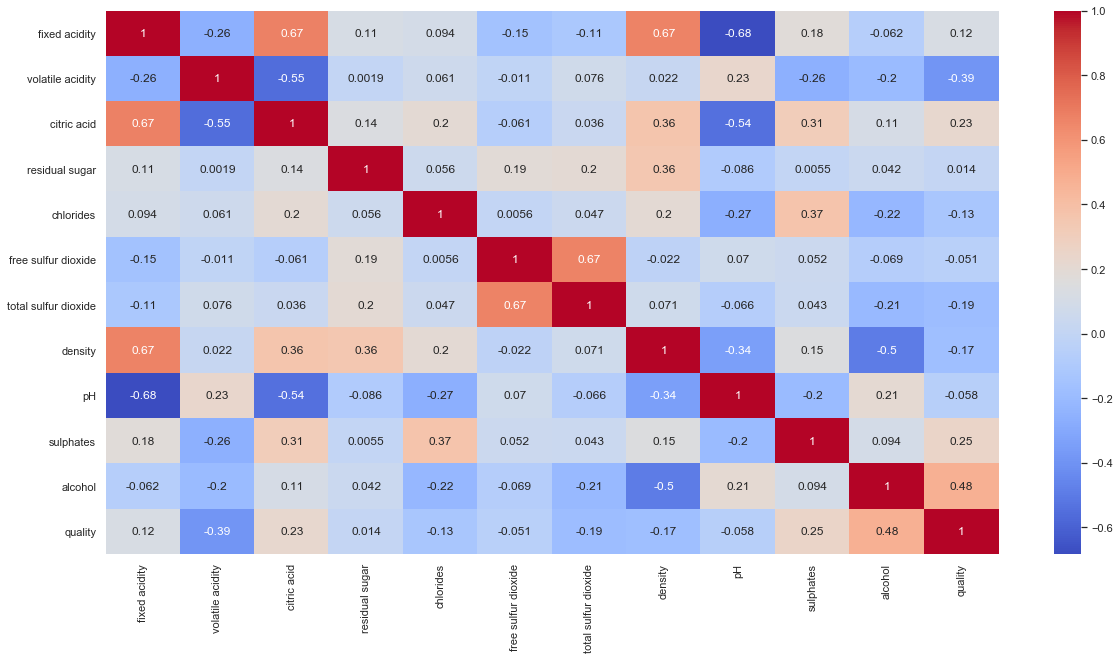

In [9]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

### Data Transform in StandardScaler
We will start with scaling our data.

In [10]:
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.25)

### Model Training

### KNN

In [12]:
# let's fit the data into kNN model and see how well it performs:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [13]:
y_pred = knn.predict(x_test)

In [14]:
knn.score(x_train,y_train)

0.6939115929941618

In [15]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.5975


In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.62      0.75      0.68       169
           6       0.62      0.55      0.58       173
           7       0.45      0.39      0.42        46
           8       0.00      0.00      0.00         1

    accuracy                           0.60       400
   macro avg       0.28      0.28      0.28       400
weighted avg       0.58      0.60      0.59       400



C:\Users\Laptop\.conda\envs\vivek\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Decision_tree

In [17]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [18]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
feature_name=list(x.columns)
class_name = list(y_train.unique())
feature_name

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [20]:
from sklearn.tree import export_graphviz

In [21]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

### Let's visualize the tree:

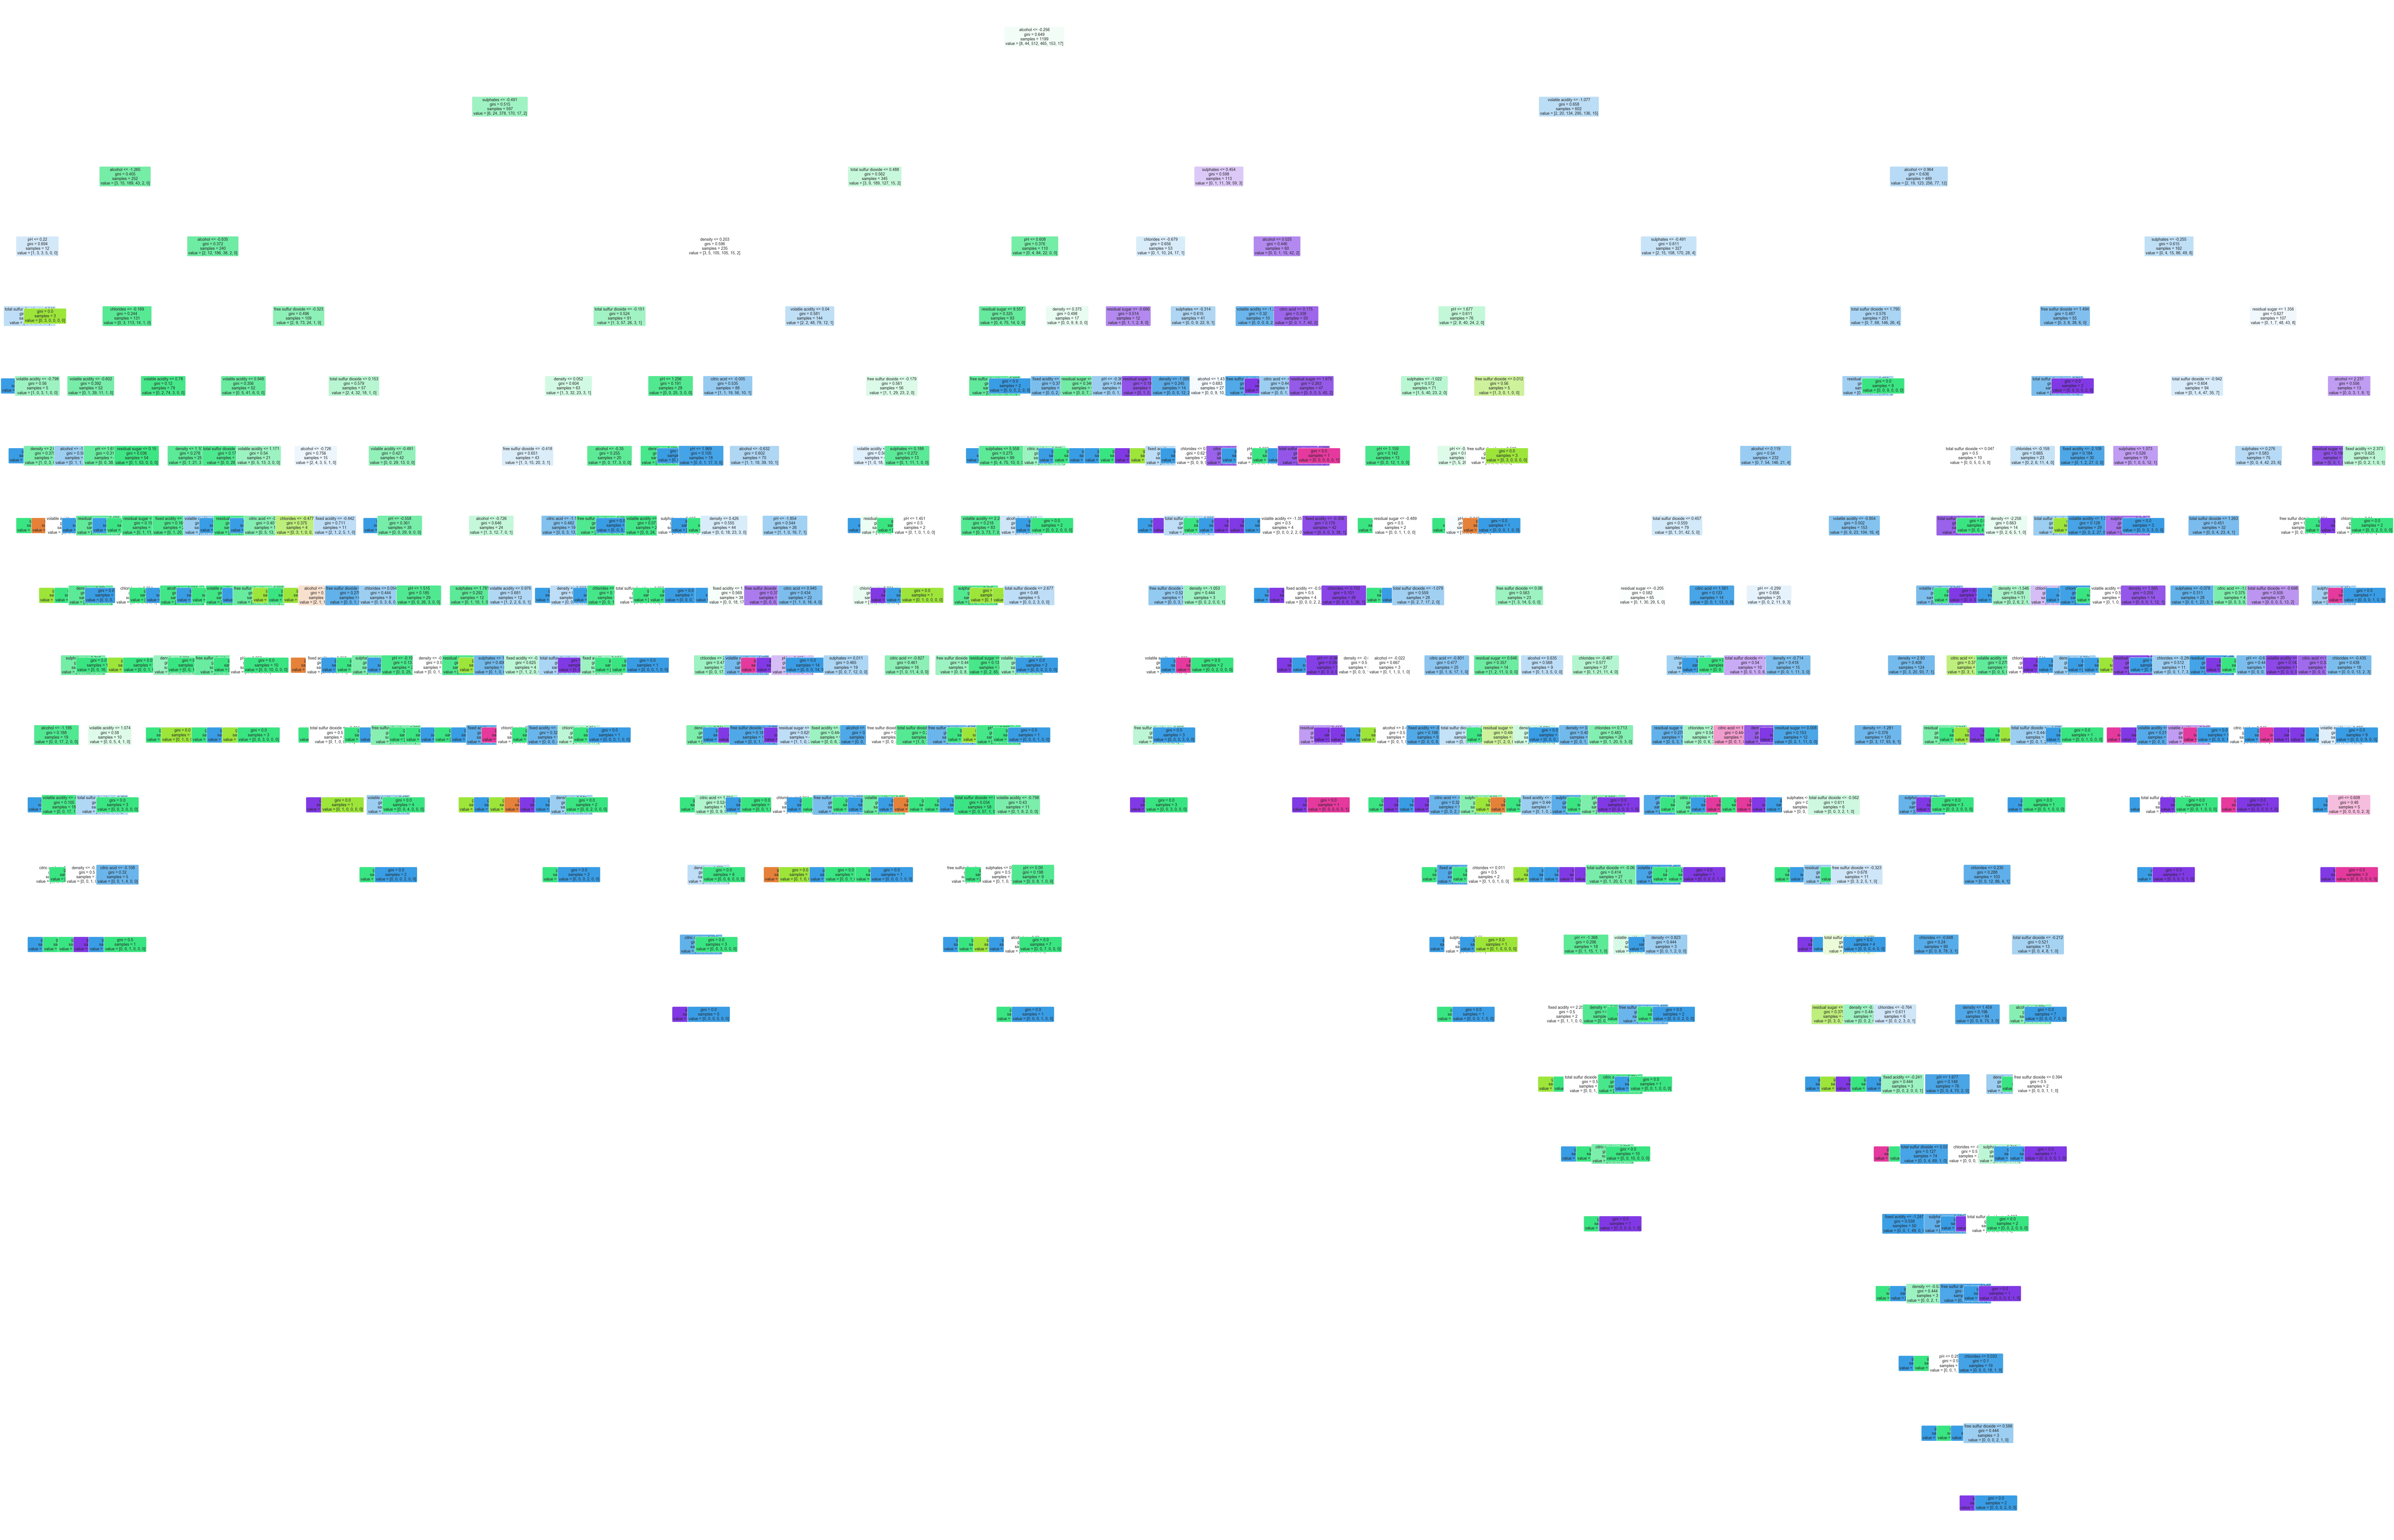

In [22]:
plt.figure(figsize=(150,100))
a = plot_tree(clf, 
              feature_names=feature_name,  
              filled=True, 
              rounded=True, 
              fontsize=14)

In [23]:
clf.score(x_train,y_train)

1.0

In [24]:
py_pred = clf.predict(x_test)

In [25]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.6025

In [26]:
print(classification_report(y_test, py_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         9
           5       0.66      0.70      0.68       169
           6       0.63      0.57      0.60       173
           7       0.50      0.54      0.52        46
           8       0.00      0.00      0.00         1

    accuracy                           0.60       400
   macro avg       0.30      0.30      0.30       400
weighted avg       0.61      0.60      0.61       400



Now we haven't done any prerocessing with our data and neither done any hyper parameter tunings.Let's do all those and see how our score improves.

#### Although our dataset is realtively small, let's use PCA for feature selection and see if it improves our accuracy.

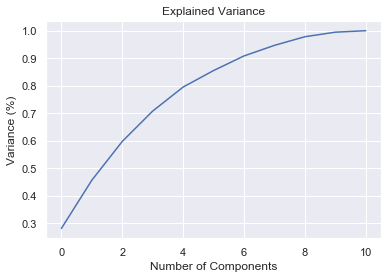

In [27]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
pca = PCA()
principalComponents = pca.fit_transform(x_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

We can see that around 98% of the variance is being explained by 8 components.
So instead of giving all 11 columns as input in our algorithm let's use these 8 principal components instead.

In [28]:
pca = PCA(n_components=8)
new_data = pca.fit_transform(x_scaled)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [29]:
principal_x.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8
0,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258
1,-0.799170,1.856553,-0.911690,0.548066,-0.018392,0.929714,-1.009829,0.762587
2,-0.748479,0.882039,-1.171394,0.411021,-0.043531,0.401473,-0.539553,0.597946
3,2.357673,-0.269976,0.243489,-0.928450,-1.499149,-0.131017,0.344290,-0.455375
4,-1.619530,0.450950,-1.774454,0.043740,0.067014,-0.913921,-0.161043,-0.282258


In [30]:
# let's see how well our model perform on this new data
x_train,x_test,y_train,y_test = train_test_split(principal_x,y,test_size = 0.30, random_state= 355)
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
clf.score(x_test,y_test)

0.5708333333333333

There is a no increase in our test accuracy.

### What are hyper parameters?

We can see the decision tree classifier algorithm takes all those parameters which are also known as hyperparameters.

Let's see the most important ones of the parameters(as per sklearn documentation) :

   

When we do hyperparameter tuning, we basically try to find those sets and values of hyperparameters which will give us a model with maximum accuracy.
Let's go ahead and try to improve our model.

Let's now try to tune some hyperparameters using the GridSearchCV algorithm.
 

In [31]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [32]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [33]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [34]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 28, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


In [35]:
grid_search.best_score_

0.5951593529788598

In [36]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth =27, min_samples_leaf= 1, min_samples_split= 3, splitter ='best')
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=27, min_samples_split=3)

In [37]:
clf.score(x_test,y_test)

0.51875

 Our test score has no improved after using Gridsearch.

Note : we must understand that giving all the hyperparameters in the gridSearch doesn't gurantee the best result. We have to do hit and trial with parameters to get the perfect score.

You are welcome to try tweaking the parameters more and try an improve the accuracy more.

 


### XGBClassifier

In [38]:
from xgboost import XGBClassifier

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
# cheking training accuracy
y_pred = model.predict(x_train)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_train,predictions)
accuracy

1.0

In [40]:
# cheking initial test accuracy
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test,predictions)
accuracy

0.6479166666666667

### The different algorithms used but the accuracy is not increasing, This is the imbalanced data problem 

### Class Imbalancement

In [41]:
y.unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [42]:
y.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=4)
# transform the dataset
X, y = oversample.fit_resample(x, y)

In [44]:
y.value_counts()

7    681
5    681
3    681
8    681
6    681
4    681
Name: quality, dtype: int64

In [45]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
# classify function
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    # train the model
    model.fit(x_train, y_train)
    print("Accuracy:", model.score(x_test, y_test) * 100)
    
    # cross-validation
    score = cross_val_score(model, X, y, cv=5)
    print("CV Score:", np.mean(score)*100)

### DecisionTreeClassifier

In [47]:
model1 = DecisionTreeClassifier()
# Accuracy of test data
classify(model1, X, y)

Accuracy: 79.9412915851272
CV Score: 74.7924453768184


## RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
classify(model2, X, y)

Accuracy: 84.54011741682974
CV Score: 81.03219184026479


In [49]:
py_pred = model2.predict(x_test)

In [50]:
print(classification_report(y_test, py_pred))

              precision    recall  f1-score   support

           3       0.96      1.00      0.98       165
           4       0.87      0.95      0.90       165
           5       0.70      0.75      0.72       185
           6       0.76      0.52      0.62       193
           7       0.81      0.95      0.87       147
           8       0.98      0.99      0.98       167

    accuracy                           0.85      1022
   macro avg       0.85      0.86      0.85      1022
weighted avg       0.84      0.85      0.84      1022



### xgboost

In [51]:
import xgboost as xgb
model3 = xgb.XGBClassifier()
classify(model3, X, y)

Accuracy: 84.05088062622309
CV Score: 80.8612521808872


In [52]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction_1.sav', 'wb') as f:
    pickle.dump(model2,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scalar,f)

with open('pca_model.sav', 'wb') as f:
    pickle.dump(pca,f)